<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [49]:
!pip install pyLDAvis
!pip install gensim

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.shape

(10000, 9)

In [3]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [6]:
text = yelp['text']

In [7]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [8]:
tokens = []

for review in tokenizer.pipe(text):
    doc_tokens = [token.text for token in review]
    tokens.append(doc_tokens)
    
yelp['tokens'] = tokens

In [9]:
yelp['tokens'].head()

0    [BEWARE!!!, FAKE,, FAKE,, FAKE....We, also, ow...
1    [Came, here, for, lunch, Togo., Service, was, ...
2    [I've, been, to, Vegas, dozens, of, times, and...
3    [We, went, here, on, a, night, where, they, cl...
4    [3.5, to, 4, stars, \n\n, Not, bad, for, the, ...
Name: tokens, dtype: object

In [10]:
#hey Dakota, tread lightly: 

tokens[0][0]

'BEWARE!!!'

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(stop_words='english', max_features=1000)


dtm = tfidf.fit_transform(yelp['text'])

docs = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())
docs.head()

,00,10,100,11,12,15,20,24,25,30,...,wow,write,wrong,year,years,yelp,yes,young,yum,yummy
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.169834,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.153861,0.138843,0.0,...,0.0,0.0,0.0,0.118308,0.0,0.0,0.0,0.149121,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.172619,0.154652,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [13]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

nn.fit(dtm.todense())

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [14]:
nn.kneighbors(dtm.todense()[1])

(array([[0.        , 1.        , 1.        , 1.10324176, 1.12683859]]),
 array([[   1, 6204, 6311, 3134, 9490]]))

In [15]:
vegan = ["""I was hoping to go on a romantic data with my 
                    girlfriend; however,it all went wrong when you 
                    guys began reiterating: 'Sir, this is a vegan restaurant,
                    we don't serve any meat'. I was deeply offended by 
                    management's decision not to serve meat and I regret
                    having chosen your restaurant. Not comning back."""]


In [16]:
new = tfidf.transform(vegan)

nn.kneighbors(new.todense())

(array([[1.        , 1.        , 1.10946087, 1.14596159, 1.16408996]]),
 array([[6311, 6204,  382, 5650, 5311]]))

In [17]:
text[2661], text[5311], text[2914], text[5493], text[5614]

("I was having trouble with my laptop it was slow with viruses. I've lots of important data in my laptop. The technician was polite and very patient with me as I was freaking out how can I save my data. He saved all my data transferred it in new installed windows plus install all the needed software which I required. Took one day but job was done very well. Over all service is satisfied.",
 "Great food with friendly service. Place is small so be sure to make a reservation and they don't serve liquor so bring your own bottle. I don't eat meat and they were more than accommodating. I have the gnocchi (without meat) while my wife had the jumbo shrimp over penne, both were fantastic! Be sure to save room for their incredible desserts.",
 "Great spot for shami/ Mediterranean style food, you won't regret it. And they're well priced for the quantity they serve !! I would say it's a $.",
 "I gave this place only 4 stars because you pretty much have to serve yourself water but other than that t

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [18]:
# Import Statements
from sklearn.pipeline import Pipeline

from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
# Create Pipeline

vect = TfidfVectorizer(stop_words='english')
sgdc = SGDClassifier()

pipe = Pipeline([('vect', vect), ('clf', sgdc)])

In [20]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__max_df': (0.5, 1),
    'clf__max_iter': (1, 5)
}

grid_search = GridSearchCV(pipe, parameters, cv=2, n_jobs=-1, verbose=1)

grid_search.fit(yelp['text'], yelp['stars'])

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   17.5s finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vect__max_df': (0.5, 1), 'clf__max_iter': (1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [21]:
best = grid_search.best_estimator_
best

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [22]:
best.predict(vegan)

array([1])

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [23]:
import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [24]:
id2word = corpora.Dictionary(yelp['tokens'])

In [25]:
id2word

In [26]:
STOPWORDS = set(STOPWORDS).union(set(['yelp']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [27]:
id2word.doc2bow(tokenize('Leaving reviews on Yelp is as good way to understand sentiment'))

[(307, 1), (960, 1), (2231, 1), (2242, 1), (2914, 1)]

In [28]:
yelp['tokens'] = yelp['text'].apply(tokenize)

In [29]:
corpus = [id2word.doc2bow(text) for text in yelp['tokens']]

In [30]:
corpus[0]

[(17, 1),
 (22, 1),
 (25, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (34, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 2),
 (47, 1),
 (51, 3),
 (54, 1),
 (55, 2),
 (56, 1),
 (58, 1),
 (59, 1),
 (61, 1),
 (65, 1),
 (67, 1),
 (69, 1),
 (927, 3),
 (6970, 1),
 (12287, 1),
 (14686, 1),
 (18275, 1),
 (25022, 1),
 (26440, 1),
 (34924, 1),
 (66253, 1)]

In [35]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=42,
                   num_topics =5,
                   passes=10,
                   workers=4
                  )

In [36]:
lda.print_topics()

[(0,
  '0.009*"time" + 0.008*"service" + 0.006*"great" + 0.006*"like" + 0.005*"room" + 0.005*"said" + 0.005*"place" + 0.005*"got" + 0.004*"told" + 0.004*"staff"'),
 (1,
  '0.017*"place" + 0.013*"food" + 0.012*"great" + 0.012*"good" + 0.010*"like" + 0.006*"service" + 0.006*"friendly" + 0.006*"pizza" + 0.005*"nice" + 0.005*"best"'),
 (2,
  '0.008*"place" + 0.007*"time" + 0.005*"great" + 0.004*"people" + 0.004*"love" + 0.004*"know" + 0.003*"service" + 0.003*"come" + 0.003*"work" + 0.003*"like"'),
 (3,
  '0.017*"food" + 0.014*"good" + 0.010*"place" + 0.009*"great" + 0.008*"service" + 0.007*"like" + 0.007*"time" + 0.006*"ordered" + 0.006*"chicken" + 0.006*"restaurant"'),
 (4,
  '0.006*"great" + 0.004*"best" + 0.004*"la" + 0.003*"vegas" + 0.003*"et" + 0.003*"le" + 0.002*"like" + 0.002*"bike" + 0.002*"love" + 0.002*"les"')]

In [37]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [38]:
topics = [' '.join(t[0:5]) for t in words]

In [39]:
topics

['time service great like room',
 'place food great good like',
 'place time great people love',
 'food good place great service',
 'great best la vegas et']

topic modeling analysis: 

From our topic modeling analysis, filtering by the top 3 highest probability words per topic, ther are a few interesting observations, namely: most topics contain positive descriptive adjectives, and the word food)

In [41]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [88]:
distro = [lda[d] for d in corpus]

In [153]:
distro

[[(0, 0.98099184)],
 [(0, 0.18687133),
  (1, 0.7662311),
  (2, 0.015611162),
  (3, 0.015841657),
  (4, 0.015444708)],
 [(0, 0.9903656)],
 [(0, 0.9568367),
  (1, 0.010821961),
  (2, 0.010720318),
  (3, 0.010910774),
  (4, 0.010710214)],
 [(1, 0.23023622), (3, 0.7556374)],
 [(1, 0.44098842), (3, 0.5362356)],
 [(0, 0.2999815), (2, 0.37734058), (3, 0.31507373)],
 [(1, 0.10150025), (2, 0.06211213), (3, 0.8194151)],
 [(0, 0.7427818), (3, 0.2497564)],
 [(0, 0.38036644), (3, 0.6011383)],
 [(1, 0.223496), (3, 0.77064836)],
 [(0, 0.99626297)],
 [(3, 0.96119696)],
 [(0, 0.08629222), (3, 0.89021254)],
 [(0, 0.99311906)],
 [(0, 0.049564052), (1, 0.30003592), (3, 0.642633)],
 [(0, 0.2866799), (1, 0.4532707), (3, 0.24966829)],
 [(3, 0.97350895)],
 [(0, 0.9797213)],
 [(0, 0.08129627), (1, 0.37283462), (3, 0.54145366)],
 [(1, 0.23307608), (3, 0.75282246)],
 [(0, 0.2674886), (1, 0.48930487), (2, 0.12044815), (3, 0.11914306)],
 [(0, 0.40490103), (1, 0.18911642), (2, 0.042255513), (3, 0.36249226)],
 [(2, 

In [91]:
def update(doc):
        d_dist = {k:0 for k in range(0,5)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [106]:
df = pd.DataFrame(new_distro)
df.columns = topics

In [108]:
df.head(10)

,time service great like room,place food great good like,place time great people love,food good place great service,great best la vegas et
0,0.980992,0.000000,0.000000,0.000000,0.000000
1,0.186871,0.766231,0.015611,0.015842,0.015445
2,0.990366,0.000000,0.000000,0.000000,0.000000
3,0.956837,0.010822,0.010720,0.010911,0.010710
4,0.000000,0.230236,0.000000,0.755637,0.000000
5,0.000000,0.440988,0.000000,0.536236,0.000000
6,0.299982,0.000000,0.377341,0.315074,0.000000
7,0.000000,0.101500,0.062112,0.819415,0.000000
8,0.742782,0.000000,0.000000,0.249756,0.000000
9,0.380366,0.000000,0.000000,0.601138,0.000000


In [128]:
df['stars'] = yelp['stars']

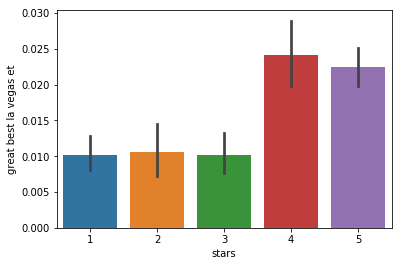

In [140]:
sns.barplot(x="stars", y="great best la vegas et", data=df);

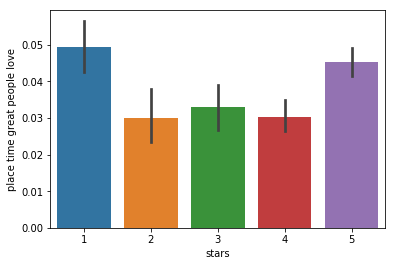

In [141]:
sns.barplot(x="stars", y="place time great people love", data=df);

In [43]:
# vis_data = pyLDAvis.gensim.prepare(lda, corpus, id2word)
# pyLDAvis.show(vis_data)

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)